In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('911.csv')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1.0
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1.0
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1.0
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1.0
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1.0


In [51]:
df.shape

(17022, 9)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17022 entries, 0 to 17021
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        17022 non-null  float64
 1   lng        17022 non-null  float64
 2   desc       17022 non-null  object 
 3   zip        14806 non-null  float64
 4   title      17022 non-null  object 
 5   timeStamp  17022 non-null  object 
 6   twp        17014 non-null  object 
 7   addr       16906 non-null  object 
 8   e          17021 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.2+ MB


In [53]:
df.isnull().sum()

,0
lat,0
lng,0
desc,0
zip,2216
title,0
timeStamp,0
twp,8
addr,116
e,1


In [54]:
df.describe()

,lat,lng,zip,e
count,17022.000000,17022.000000,14806.000000,17021.0
mean,40.162523,-75.318240,19240.985817,1.0
std,0.085004,0.156339,276.822624,0.0
min,39.974951,-77.686813,17752.000000,1.0
25%,40.102905,-75.397009,19038.000000,1.0
50%,40.149864,-75.305436,19401.000000,1.0
75%,40.230934,-75.211754,19446.000000,1.0
max,41.167156,-75.000755,19525.000000,1.0


In [55]:
df.rename(columns = {'lat':'Latitude', 'lng':'Longitude', 'desc':'Description', 'twp':'Township','addr':'Address'})

,Latitude,Longitude,Description,zip,title,timeStamp,Township,Address,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1.0
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1.0
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1.0
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1.0
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1.0
...,...,...,...,...,...,...,...,...,...
17017,40.294356,-75.388541,KINGSCOTE DR & HARCOURT LN; FRANCONIA; Statio...,19438.0,EMS: CVA/STROKE,2016-01-23 13:27:01,FRANCONIA,KINGSCOTE DR & HARCOURT LN,1.0
17018,39.986694,-75.256963,CITY AVE & HOLLINGSWORTH RD; LOWER MERION; St...,19151.0,EMS: FALL VICTIM,2016-01-23 13:27:01,LOWER MERION,CITY AVE & HOLLINGSWORTH RD,1.0
17019,40.294356,-75.388541,KINGSCOTE DR & HARCOURT LN; FRANCONIA; 2016-01...,19438.0,Fire: FIRE SPECIAL SERVICE,2016-01-23 13:31:00,FRANCONIA,KINGSCOTE DR & HARCOURT LN,1.0
17020,40.232727,-75.527298,W RIDGE PIKE & N LEWIS RD; LIMERICK; 2016-01-2...,19468.0,Traffic: DISABLED VEHICLE -,2016-01-23 13:31:02,LIMERICK,W RIDGE PIKE & N LEWIS RD,1.0


In [56]:
mode = df['zip'].mode()[0]
df['zip'] = df['zip'].fillna(mode)

In [57]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1.0
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1.0
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1.0
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1.0
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19401.0,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1.0


In [58]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
calls_by_day = df.groupby(df['timeStamp'].dt.day_name())['e'].count()
print(calls_by_day)


timeStamp
Friday       2613
Monday       2409
Saturday     2440
Sunday       1922
Thursday     2414
Tuesday      2702
Wednesday    2521
Name: e, dtype: int64


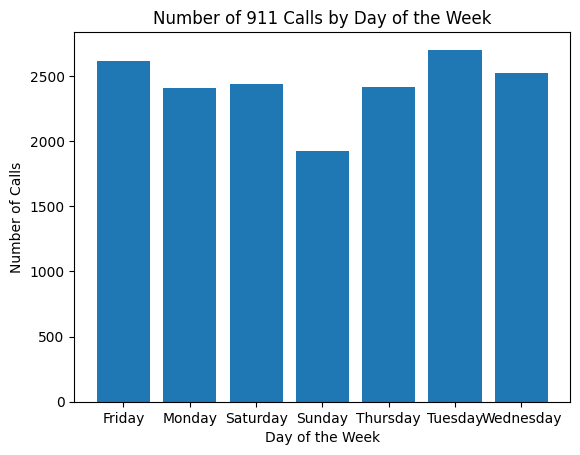

In [59]:
plt.bar(calls_by_day.index, calls_by_day.values)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Calls')
plt.title('Number of 911 Calls by Day of the Week')
plt.show()

In [60]:
df['month'] = df['timeStamp'].dt.strftime('%B')
calls_by_month = df.groupby('month')['timeStamp'].count().reset_index(name='count')
calls_by_month = calls_by_month.sort_values(by='count', ascending=False)
print(calls_by_month)

      month  count
1   January   9053
0  December   7969


In [61]:
df_month = df.groupby(df['timeStamp'].dt.to_period('M')).size().reset_index(name='Count')
df_month['Month'] = df_month['timeStamp'].dt.strftime('%B %Y')
df_month = df_month[['Month', 'Count']].sort_values(by='Count', ascending=False).reset_index(drop=True)
print(df_month)

           Month  Count
0   January 2016   9053
1  December 2015   7969


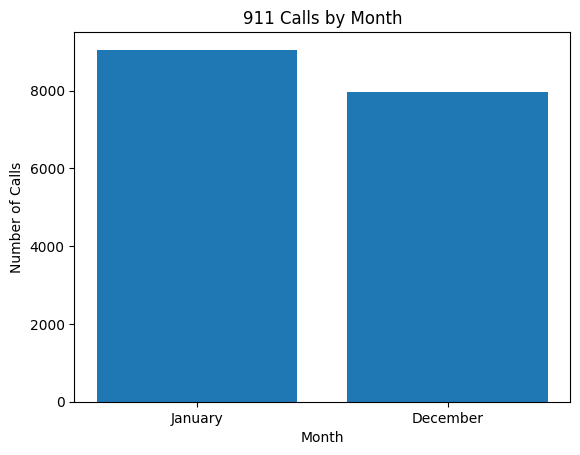

In [62]:
plt.bar(calls_by_month['month'], calls_by_month['count'])
plt.xlabel('Month')
plt.ylabel('Number of Calls')
plt.title('911 Calls by Month')
plt.show()

Reason
EMS        8251
Fire       2377
Traffic    6393
Name: e, dtype: int64


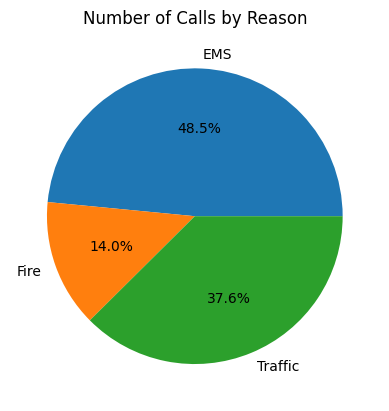

In [63]:
df['Reason']=df['title'].str.split(':').str[0].str.strip()
reason = df.groupby('Reason')['e'].count()
print(reason)
plt.pie(reason.values, labels=reason.index, autopct='%1.1f%%')
plt.title('Number of Calls by Reason')
plt.show()

In [64]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,month,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1.0,December,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1.0,December,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1.0,December,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1.0,December,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19401.0,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1.0,December,EMS


In [65]:
calls_by_town = df.groupby('twp')['e'].count()
calls_by_town = calls_by_town.sort_values(ascending=False)
print(calls_by_town.head(10))
top_towns = calls_by_town.nlargest(10)

twp
LOWER MERION        1263
ABINGTON            1017
NORRISTOWN           956
UPPER MERION         909
CHELTENHAM           756
POTTSTOWN            688
LOWER PROVIDENCE     616
UPPER MORELAND       603
HORSHAM              561
MONTGOMERY           542
Name: e, dtype: int64


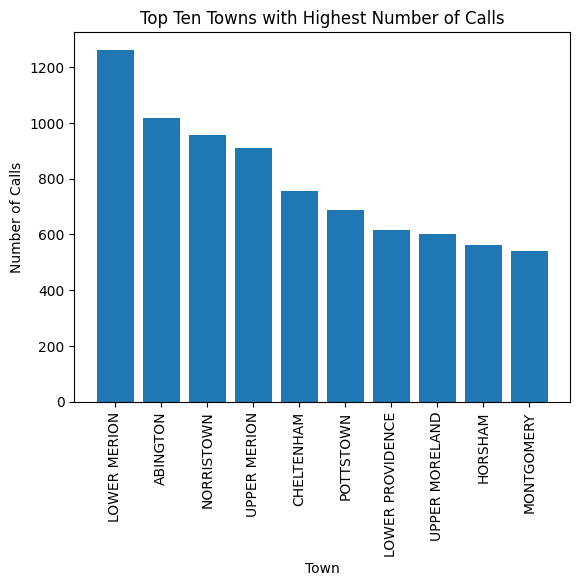

In [66]:
plt.bar(top_towns.index, top_towns.values)
plt.title('Top Ten Towns with Highest Number of Calls')
plt.xlabel('Town')
plt.ylabel('Number of Calls')
plt.tick_params(axis='x', rotation=90)
plt.show()